# Pima Indian Diabetes

## Shriya Gotimukul

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Reading the data

In [2]:
# loading in the data
diabetes_df = pd.read_csv(r'https://raw.githubusercontent.com/shriyagoti/PythonPortfolioProjects/main/Pima%20Indian%20Diabetes%20Analysis/diabetes.csv')
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Data Cleaning 

A data science project's data cleaning stage involves eliminating duplicate and null values, corrupt or inconsistent data, invalid entries, handling missing values, and incorrect formatting from the data set.

In [3]:
diabetes_df.shape

(768, 9)

## Are there any Null Values?

In [4]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Are there any duplicate values?

In [5]:
diabetes_df[diabetes_df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


## Are there any Inconsistent Datatypes?

In [6]:
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Renaming the DiabetesPedigreeFunction Column name to Pedigree

In [8]:
diabetes_df.rename(columns={'DiabetesPedigreeFunction':'Pedigree'}, inplace = True)

In [9]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [10]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Exploratory Data Analysis (EDA)

The exploratory data analysis (EDA) stage analyzes and summarizes the main characteristics of a data set and often uses data visualization to aid in this process.

This stage involves obtaining some basic descriptive statistics of the features in the dataset, to take a look at the dataset's information, and then to investigate the correlation between the features.

In [12]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Based on the correlations, I want to determine which features are the most likely to predict diabetes outcomes.

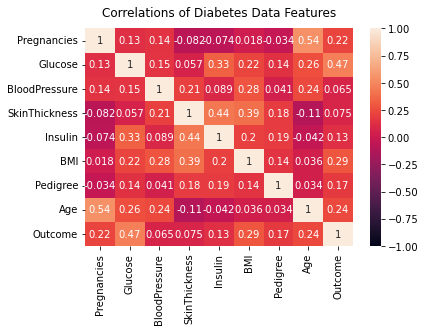

In [15]:
heatmap = sns.heatmap(diabetes_df.corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlations of Diabetes Data Features', fontdict={'fontsize':12}, pad=12);

The above heatmap shows that Blood Pressure and Skin Thickness are not good contributors in predicting the Outcome.

# Modeling

Supervised and unsupervised learning are the two main approaches in data mining. Based on the patterns between the independent variables, supervised techniques are used to predict a target variable. The classification technique is the most used method for learning from historical data and classifying the present data. The output target variable in this dataset is a categorical variable (nominal or ordinal). The Classification of a predictive model usually depends on the Predictive accuracy and the Interpretability. Before using the dataset to build the model, the data is split into two mutually exclusive sets, training (70%), and testing (30%) data

In [16]:
feature_variables = diabetes_df.drop(columns='Outcome')
target_variables = diabetes_df['Outcome']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(feature_variables, target_variables, test_size=0.30,random_state=0)

## Logistic Regression

The next step is to create a Logistic Regression classifier object using the LogisticRegression() function, and then fit my model on the trin set using fit(). I am setting a limit for iterations to avoid an error.

In [18]:
log_reg = LogisticRegression(max_iter=1000)

# fit the model with data
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred.shape

(231,)

In [19]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
580,0,151,90,46,0,42.1,0.371,21
418,1,83,68,0,0,18.2,0.624,27
764,2,122,70,27,0,36.8,0.340,27
363,4,146,78,0,0,38.5,0.520,67
757,0,123,72,0,0,36.3,0.258,52


In [20]:
X_train.shape, diabetes_df.shape

((537, 8), (768, 9))

## How well did our model perform?

In [21]:
log_reg.score(X_test,y_test)

0.7792207792207793

In [22]:
score = accuracy_score(y_test,y_pred)
score

0.7792207792207793

Model performance was good with 80% accuracy. The model correctly classified 80% of the sample in the test dataset. In order to evaluate the model's performance on the data, I would like to create a confusion matrix.

In [23]:
X_test.shape

(231, 8)

In [24]:
con_matrix = metrics.confusion_matrix(y_test, y_pred)
con_matrix

array([[141,  16],
       [ 35,  39]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score of Logistic Regression: 0.78')

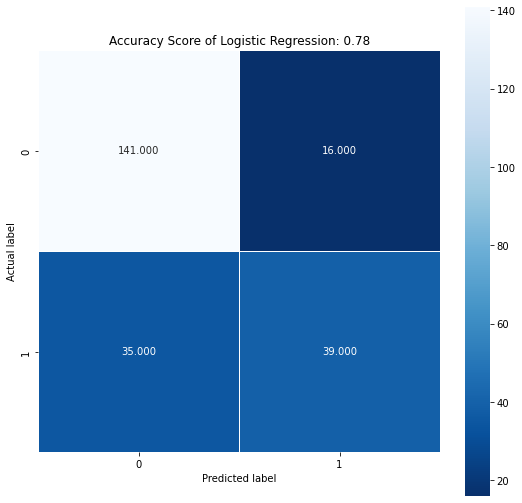

In [25]:
plt.figure(figsize=(9,9))
sns.heatmap(con_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score of Logistic Regression: {0}'.format(round(score,2))
plt.title(all_sample_title, size = 12)

The dimension of this matrix is 2*2 because this model is binary classification. The classes of the Outcome variable are 0 and 1. 

Diagonal values show the accurate predictions, while non-diagonals show inaccurate predictions. In the output, 141 and 40 are actual predictions, and there are 34 and 16 incorrect predictions. This modely correctly classified 181/231 (78.3%) samples and misclassified 50/231 samples (21.6%). 

In [26]:
target_names = ['without Diabetes', 'with Diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without Diabetes       0.80      0.90      0.85       157
   with Diabetes       0.71      0.53      0.60        74

        accuracy                           0.78       231
       macro avg       0.76      0.71      0.73       231
    weighted avg       0.77      0.78      0.77       231



## SVM Classifier

In [27]:
SVM_classifier = SVC(kernel = 'linear', random_state = 0)
svm_reg = SVM_classifier.fit(X_train, y_train)
y_pred_svm = SVM_classifier.predict(X_test)
y_pred_svm.shape

(231,)

In [28]:
score_svm = svm_reg.score(X_test,y_test)
score 

0.7792207792207793

In [29]:
con_matrix_svm = metrics.confusion_matrix(y_test, y_pred_svm)
con_matrix_svm

array([[141,  16],
       [ 34,  40]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score of SVM machine: 0.78')

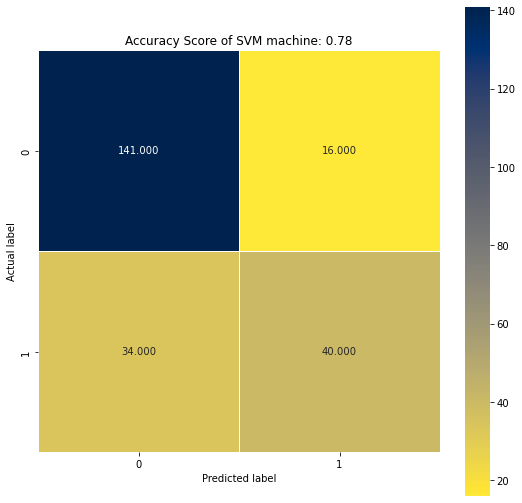

In [30]:
plt.figure(figsize=(9,9))
sns.heatmap(con_matrix_svm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'cividis_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score of SVM machine: {0}'.format(round(score_svm,2))
plt.title(all_sample_title, size = 12)

Diagonal values show the accurate predictions, while non-diagonals show inaccurate predictions. In the output, 141 and 40 are actual predictions, and there are 34 and 16 incorrect predictions. This modely correctly classified 181/231 (78.3%) samples and misclassified 50/231 samples (21.6%).

In [31]:
target_names = ['without Diabetes', 'with Diabetes']
print(classification_report(y_test, y_pred_svm, target_names=target_names))

                  precision    recall  f1-score   support

without Diabetes       0.81      0.90      0.85       157
   with Diabetes       0.71      0.54      0.62        74

        accuracy                           0.78       231
       macro avg       0.76      0.72      0.73       231
    weighted avg       0.78      0.78      0.77       231



## KNN 

In [32]:
KNN_Classifier = KNeighborsClassifier(n_neighbors=3)
knn_class = KNN_Classifier.fit(X_train,y_train)
y_pred_knn = KNN_Classifier.predict(X_test)
y_pred_knn.shape

(231,)

In [33]:
score_knn = knn_class.score(X_test,y_test)
score_knn

0.6926406926406926

In [34]:
con_matrix_knn= metrics.confusion_matrix(y_test,y_pred_knn)
con_matrix_knn

array([[123,  34],
       [ 37,  37]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score of KNN: 0.69')

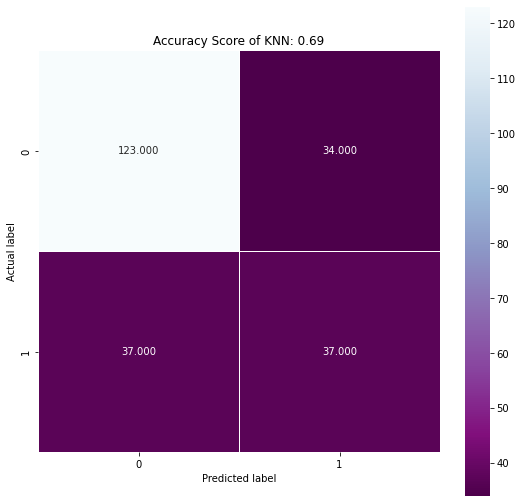

In [35]:
plt.figure(figsize=(9,9))
sns.heatmap(con_matrix_knn, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'BuPu_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score of KNN: {0}'.format(round(score_knn,2))
plt.title(all_sample_title, size = 12)

Diagonal values show the accurate predictions, while non-diagonals show inaccurate predictions. In the output, 123 and 37 are actual predictions, and there are 37 and 34 incorrect predictions. This modely correctly classified 160/231 (69.26%) samples and misclassified 71/231 samples (30.7%).

In [36]:
target_names = ['without Diabetes', 'with Diabetes']
print(classification_report(y_test, y_pred_knn, target_names=target_names))

                  precision    recall  f1-score   support

without Diabetes       0.77      0.78      0.78       157
   with Diabetes       0.52      0.50      0.51        74

        accuracy                           0.69       231
       macro avg       0.64      0.64      0.64       231
    weighted avg       0.69      0.69      0.69       231



## Random Forest

In [37]:
RF_Classifier = RandomForestClassifier(n_estimators=100)
rf_class = RF_Classifier.fit(X_train,y_train)
y_pred_rf = RF_Classifier.predict(X_test)
y_pred_rf.shape

(231,)

In [38]:
score_rf = rf_class.score(X_test,y_test)
score_rf

0.7662337662337663

In [39]:
con_matrix_rf = metrics.confusion_matrix(y_test,y_pred_rf)
con_matrix_rf

array([[139,  18],
       [ 36,  38]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score of Random Forest: 0.77')

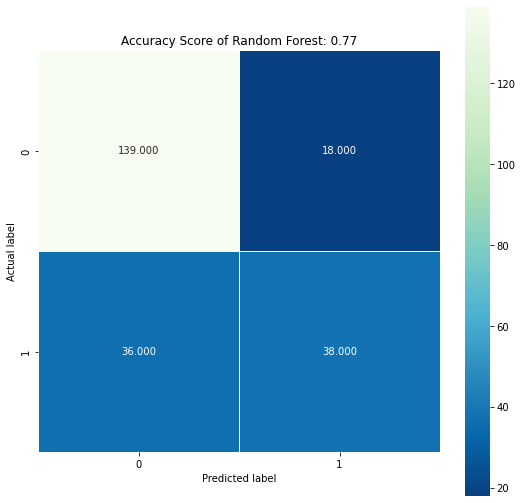

In [40]:
plt.figure(figsize=(9,9))
sns.heatmap(con_matrix_rf, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'GnBu_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score of Random Forest: {0}'.format(round(score_rf,2))
plt.title(all_sample_title, size = 12)

Diagonal values show the accurate predictions, while non-diagonals show inaccurate predictions. In the output, 141 and 39 are actual predictions, and there are 35 and 36 incorrect predictions. This modely correctly classified 180/231 (77.92%) samples and misclassified 51/231 samples (22.0%).

In [41]:
target_names = ['without Diabetes', 'with Diabetes']
print(classification_report(y_test, y_pred_rf, target_names=target_names))

                  precision    recall  f1-score   support

without Diabetes       0.79      0.89      0.84       157
   with Diabetes       0.68      0.51      0.58        74

        accuracy                           0.77       231
       macro avg       0.74      0.70      0.71       231
    weighted avg       0.76      0.77      0.76       231



## Decision Tree

In [42]:
DT_Classifier = DecisionTreeClassifier()
dt_class = DT_Classifier.fit(X_train,y_train)
y_pred_dt = DT_Classifier.predict(X_test)
y_pred_dt.shape

(231,)

In [43]:
score_dt = dt_class.score(X_test,y_test)
score_dt

0.7272727272727273

In [44]:
con_matrix_dt = metrics.confusion_matrix(y_test,y_pred_dt)
con_matrix_dt

array([[125,  32],
       [ 31,  43]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score of Decision Tree: 0.73')

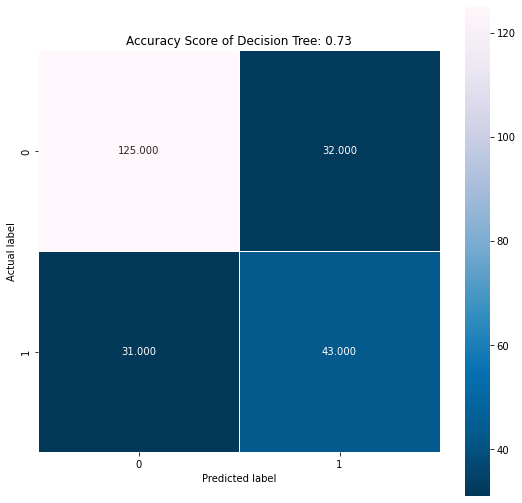

In [45]:
plt.figure(figsize=(9,9))
sns.heatmap(con_matrix_dt, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'PuBu_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score of Decision Tree: {0}'.format(round(score_dt,2))
plt.title(all_sample_title, size = 12)

Diagonal values show the accurate predictions, while non-diagonals show inaccurate predictions. In the output, 124 and 44 are actual predictions, and there are 30 and 33 incorrect predictions. This modely correctly classified 168/231 (72.27%) samples and misclassified 63/231 samples (27.27%).

In [46]:
target_names = ['without Diabetes', 'with Diabetes']
print(classification_report(y_test, y_pred_dt, target_names=target_names))

                  precision    recall  f1-score   support

without Diabetes       0.80      0.80      0.80       157
   with Diabetes       0.57      0.58      0.58        74

        accuracy                           0.73       231
       macro avg       0.69      0.69      0.69       231
    weighted avg       0.73      0.73      0.73       231

